In [1]:
import torch
from torch import nn

1. Collect data
2. Build a model
3. Fit the model to data
4. Do inference
5. Save model
   

In [2]:
import matplotlib.pyplot as plt


Y = mx + b

In [3]:
# Device-agnostic code for Mac
if torch.cuda.is_available():
    device = "cuda"  # NVIDIA GPU
elif torch.backends.mps.is_available():
    device = "mps"   # Apple Silicon GPU
else:
    device = "cpu"

print(f"Using device: {device}")

Using device: mps


In [4]:
weight = 0.7
bias = 0.3

start = 0 
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

In [5]:
y,X

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660],
         [0.5800],
         [0.5940],
         [0.6080],
         [0.6220],
         [0.6360],
         [0.6500],
         [0.6640],
         [0.6780],
         [0.6920],
         [0.7060],
         [0.7200],
         [0.7340],
         [0.7480],
         [0.7620],
         [0.7760],
         [0.7900],
         [0.8040],
         [0.8180],
         [0.8320],
         [0.8460],
         [0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[0.0000],
         [0.0200],
         [

### Train and Test

### Generalization: The ability for a machine learning model to perform well on data it hasn't seen before

In [6]:
#create a train/test split
X = X.to(device)
y = y.to(device)

train_split = int(0.8 *len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]


In [7]:
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [8]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    
    plt.figure(figsize=(10, 7))
    
    # Move tensors to CPU for plotting
    plt.scatter(train_data.cpu(), train_labels.cpu(), c="b", s=4, label="Training data")
    plt.scatter(test_data.cpu(), test_labels.cpu(), c="g", s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data.cpu(), predictions.cpu(), c="r", s=4, label="Predictions")
    
    plt.legend()
    plt.show()

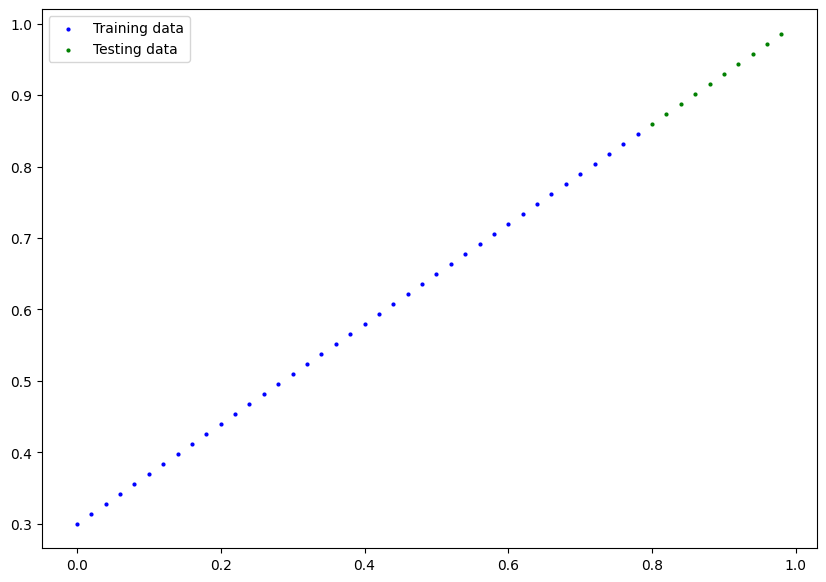

In [9]:
plot_predictions();

### Building a pytorch model


Parameters are Tensor subclasses, that have a very special property when used with Module s - when they’re assigned as Module attributes they are automatically added to the list of its parameters, and will appear e.g. in parameters() iterator. Assigning a Tensor doesn’t have such effect. This is because one might want to cache some temporary state, like last hidden state of the RNN, in the model. If there was no such class as Parameter, these temporaries would get registered too.


In [10]:
#nn.module is the base class for all neural networks modujles
#Modules can also contain other Modules, allowing them to be nested in a tree structure.
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

* torch.nn contains all of the buildings for computational graphs
* torch.nn.Patameter
* torch.nn.Module is the base class
* torch.optim is where the optimizers in Pytorch live that will help with gradient descent. eg.adam
* forward method defines what happens in the forward computation
  

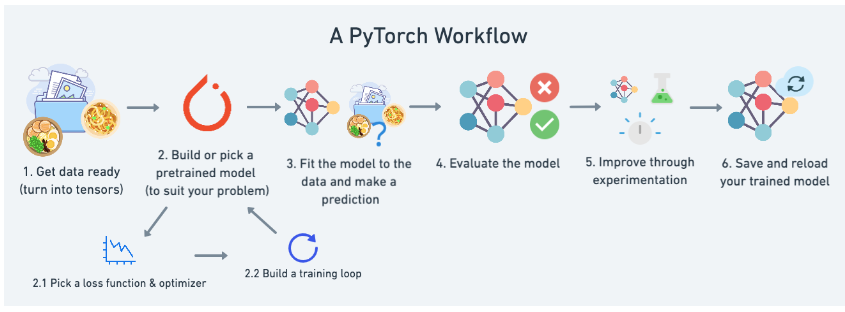

https://www.learnpytorch.io/pytorch_cheatsheet/

In [11]:
torch.manual_seed(42)

model = LinearRegressionModel().to(device)

list(model.parameters())

[Parameter containing:
 tensor([[0.7645]], device='mps:0', requires_grad=True),
 Parameter containing:
 tensor([0.8300], device='mps:0', requires_grad=True)]

In [12]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='mps:0')),
             ('linear_layer.bias', tensor([0.8300], device='mps:0'))])

## Inference mode turns off gradient

In [13]:
#Doing inference

with torch.inference_mode():
    y_preds = model(X_test).to(device)

y_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]], device='mps:0')

In [14]:
print(f"X_test shape: {X_test.shape}")
print(f"y_preds shape: {y_preds.shape}")
print(f"y_preds length: {len(y_preds)}")
print(f"\ny_preds:\n{y_preds}")

X_test shape: torch.Size([10, 1])
y_preds shape: torch.Size([10, 1])
y_preds length: 10

y_preds:
tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]], device='mps:0')


In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]], device='mps:0')

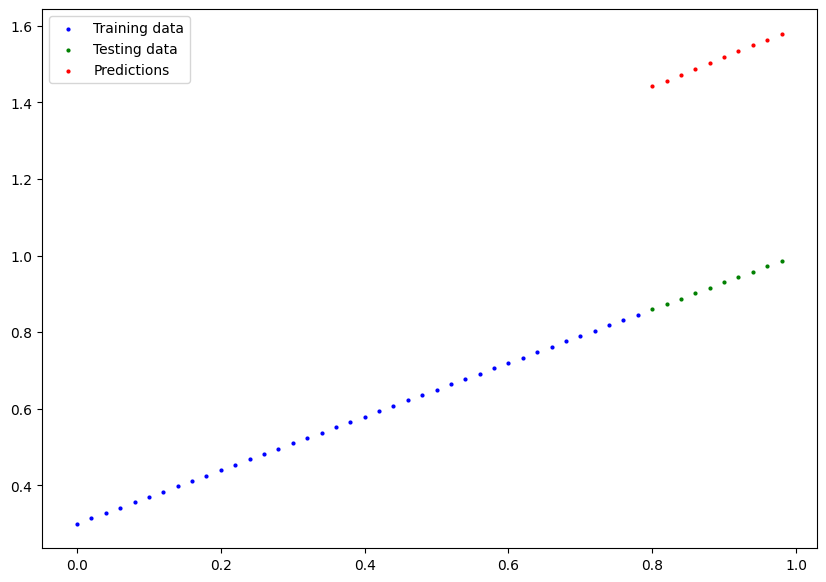

In [16]:
plot_predictions(predictions=y_preds);

## Use a suitable loss functions

In [17]:
#Optimizer applies the gradient descent algorithm 

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model.parameters(),lr=0.01)



### Building a training and testing loop

* Loop through the data
* Forward pass
* Calculate the loss
* Optimizer zero grad
* Optimizer step

## Optimizer step is back propagation 
https://jrwright.info/introai/slides/16-TrainingNeuralNetworks.pdf


In [26]:
torch.manual_seed(42)
epochs = 100

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred,y_train)
    print(loss)
    optimizer.zero_grad()

    #backpropagation
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)
    print(test_loss)
    

tensor(0.0062, device='mps:0', grad_fn=<MeanBackward0>)
tensor(0.0141, device='mps:0')
tensor(0.0059, device='mps:0', grad_fn=<MeanBackward0>)
tensor(0.0130, device='mps:0')
tensor(0.0055, device='mps:0', grad_fn=<MeanBackward0>)
tensor(0.0119, device='mps:0')
tensor(0.0052, device='mps:0', grad_fn=<MeanBackward0>)
tensor(0.0115, device='mps:0')
tensor(0.0048, device='mps:0', grad_fn=<MeanBackward0>)
tensor(0.0104, device='mps:0')
tensor(0.0045, device='mps:0', grad_fn=<MeanBackward0>)
tensor(0.0100, device='mps:0')
tensor(0.0042, device='mps:0', grad_fn=<MeanBackward0>)
tensor(0.0088, device='mps:0')
tensor(0.0038, device='mps:0', grad_fn=<MeanBackward0>)
tensor(0.0084, device='mps:0')
tensor(0.0035, device='mps:0', grad_fn=<MeanBackward0>)
tensor(0.0073, device='mps:0')
tensor(0.0031, device='mps:0', grad_fn=<MeanBackward0>)
tensor(0.0062, device='mps:0')
tensor(0.0028, device='mps:0', grad_fn=<MeanBackward0>)
tensor(0.0058, device='mps:0')
tensor(0.0024, device='mps:0', grad_fn=<Mea

In [27]:
with torch.inference_mode():
    y_preds = model(X_test)


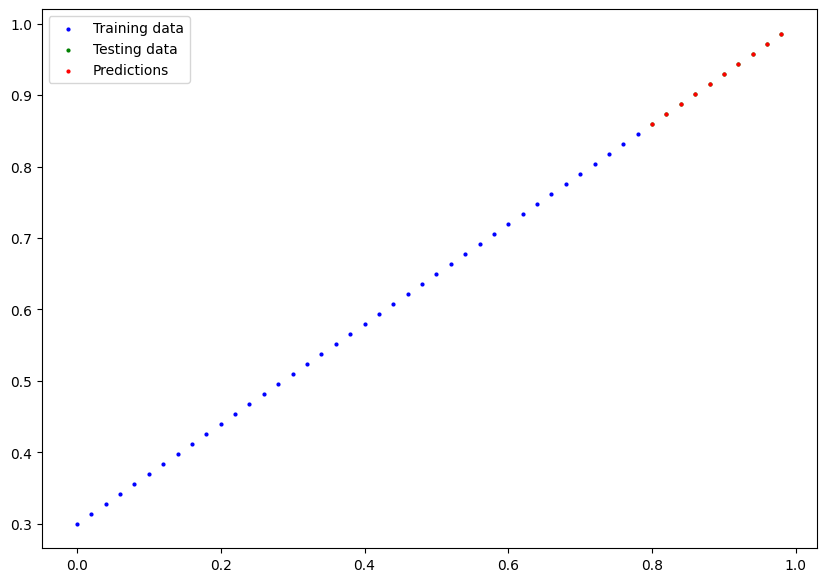

In [28]:
plot_predictions(predictions=y_preds)

## Saving and loading a model

In [21]:
from pathlib import Path


MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


MODEL_NAME = "pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), 
           f=MODEL_SAVE_PATH)


Saving model to: models/pytorch_workflow_model.pth


In [22]:
loaded_model = LinearRegressionModel().to(device)

In [23]:
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

/var/folders/nj/r7qk_bqn0q5gw27glrt6pfgc0000gn/T/ipykernel_56227/1318612949.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MOD

<All keys matched successfully>

In [24]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
loaded_model_preds


tensor([[0.8483],
        [0.8617],
        [0.8750],
        [0.8884],
        [0.9018],
        [0.9152],
        [0.9286],
        [0.9420],
        [0.9553],
        [0.9687]], device='mps:0')

In [25]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='mps:0')